<a href="https://colab.research.google.com/github/hoanguyen071710/Python-Project/blob/main/Final_Project_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/AI Specialist for Data Scientist/Dataset/Final Project/Data'

In [3]:
import os
os.chdir(path)
os.listdir()

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'Final Project.ipynb',
 'New Final Project.ipynb',
 'Final Project (EDA).ipynb']

In [4]:
import numpy as np
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 5000000)
pd.set_option('display.max_columns', 500)

In [5]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [6]:
train = pd.merge(customers, orders, how = "outer", on = "customer_id")
train = pd.merge(train, order_items, how = "outer", on = "order_id")
train = pd.merge(train, order_payments, how = "outer", on = "order_id")
train = pd.merge(train, order_reviews, how = "outer", on = "order_id")
train = pd.merge(train, products, how = "outer", on = "product_id")
train = pd.merge(train, sellers, how = "outer", on = "seller_id")

In [7]:
train.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1.0,credit_card,7.0,140.61,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1.0,credit_card,10.0,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP


In [8]:
train.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,119143.000000,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000
mean,35033.451298,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413
std,29823.198969,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24240.000000,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58475.000000,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


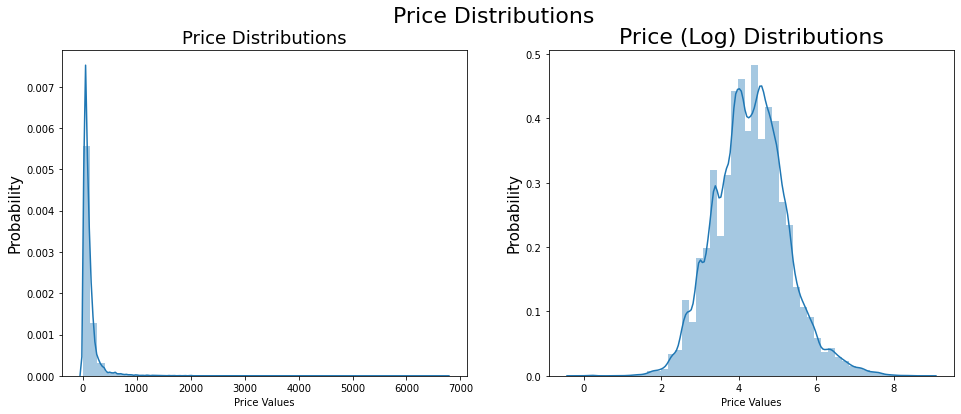

In [9]:
price_df = train["price"].fillna(-1)
log_price_df = np.log(price_df)
plt.figure(figsize = (16,6))
plt.suptitle("Price Distributions", fontsize = 22)

plt.subplot(121)
p = sns.distplot(price_df)
p.set_title("Price Distributions", fontsize = 18)
p.set_xlabel("Price Values")
p.set_ylabel("Probability", fontsize = 15)

plt.subplot(122)
lp = sns.distplot(log_price_df)
lp.set_title("Price (Log) Distributions", fontsize = 22)
lp.set_xlabel("Price Values")
lp.set_ylabel("Probability", fontsize = 15)

plt.show()

In [10]:
# Most prices focus under 1000 marks
# Log normalization give Price a normal distribution
# Potential noise in the log price distribution

,order_id,Percentage (%)
payment_type,,
boleto,23190,19.464986
credit_card,87776,73.676524
debit_card,1706,1.431965
voucher,6465,5.426526


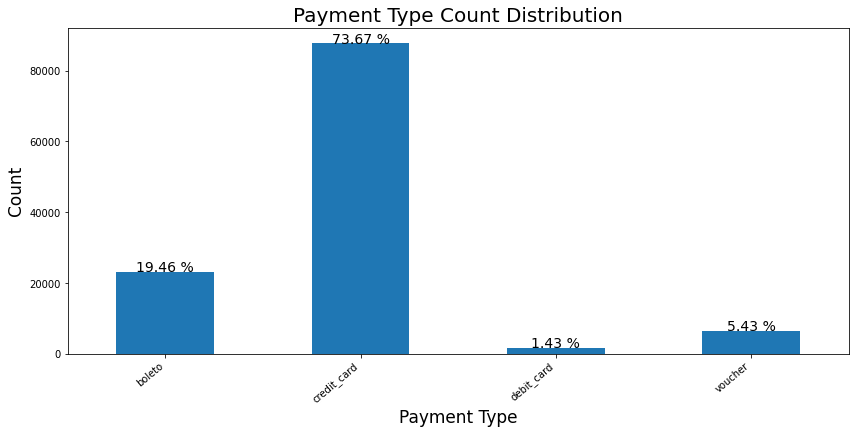

In [11]:
# Payment type count
payment_type_count = pd.pivot_table(data = train[train["payment_type"] != 'not_defined'], index = ['payment_type'], values = 'order_id', aggfunc = 'count')
payment_type_count["Percentage (%)"] = payment_type_count.apply(lambda x: (x/payment_type_count["order_id"].sum())*100)
display(payment_type_count)

plt.figure(figsize = (14,6))

# plt.suptitle("Payment Type Distribution", fontsize = 22)
plt.subplot(111)
p = payment_type_count['order_id'].plot.bar()
p.set_title("Payment Type Count Distribution", fontsize = 20)
p.set_xlabel("Payment Type", fontsize = 17)
p.set_ylabel("Count", fontsize = 17)
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = 'right')

for bin in p.patches:
  x = bin.get_x()
  y = bin.get_height()
  binwidth = bin.get_width()
  percentage = f"{round((y / len(train[train['payment_type'] != 'not_defined'])) * 100, 2)} %"
  p.annotate(percentage, (x + binwidth/2, y + 0.5), ha = "center", fontsize = 14)

plt.show()

In [12]:
# More than 70% of payment type is credit card, the most
# Second most is boleto (invoice) nearly 19.5%
# Last two are voucher and debit card at 5.43%, 1.43% respectively

,payment_value
payment_type,
boleto,177.271270
credit_card,179.723963
debit_card,150.864531
voucher,67.427353


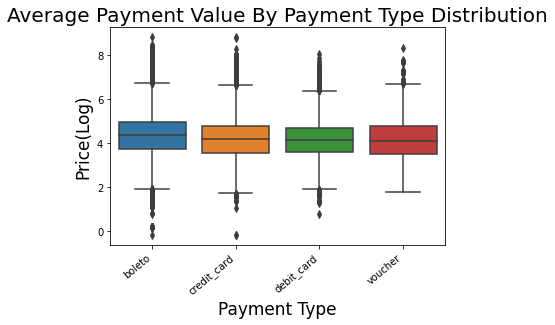

In [13]:
# Average payment value by payment type
train['price_log'] = np.log(train['price'])
average_payment_value_by_payment_type = pd.pivot_table(data = train[train["payment_type"] != 'not_defined'], index = ['payment_type'], values = 'payment_value', aggfunc = 'mean')
display(average_payment_value_by_payment_type)

# plt.subplot(111)
apt = sns.boxplot(x = 'payment_type', y = 'price_log',data = train[train['payment_type'] != 'not_defined'])
apt.set_title("Average Payment Value By Payment Type Distribution", fontsize = 20)
apt.set_xlabel("Payment Type", fontsize = 17)
apt.set_ylabel("Price(Log)", fontsize = 17)
apt.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = 'right')

plt.show()

In [14]:
# Boleto seems to have the most outlier
# Credit card and voucher outlier focus mostly to the right
# Voucher seems to be skewed

,payment_value
customer_state,
PB,282.081879
AC,262.998526
AP,257.651190
AL,242.018254
RR,239.657885


(27, 1)

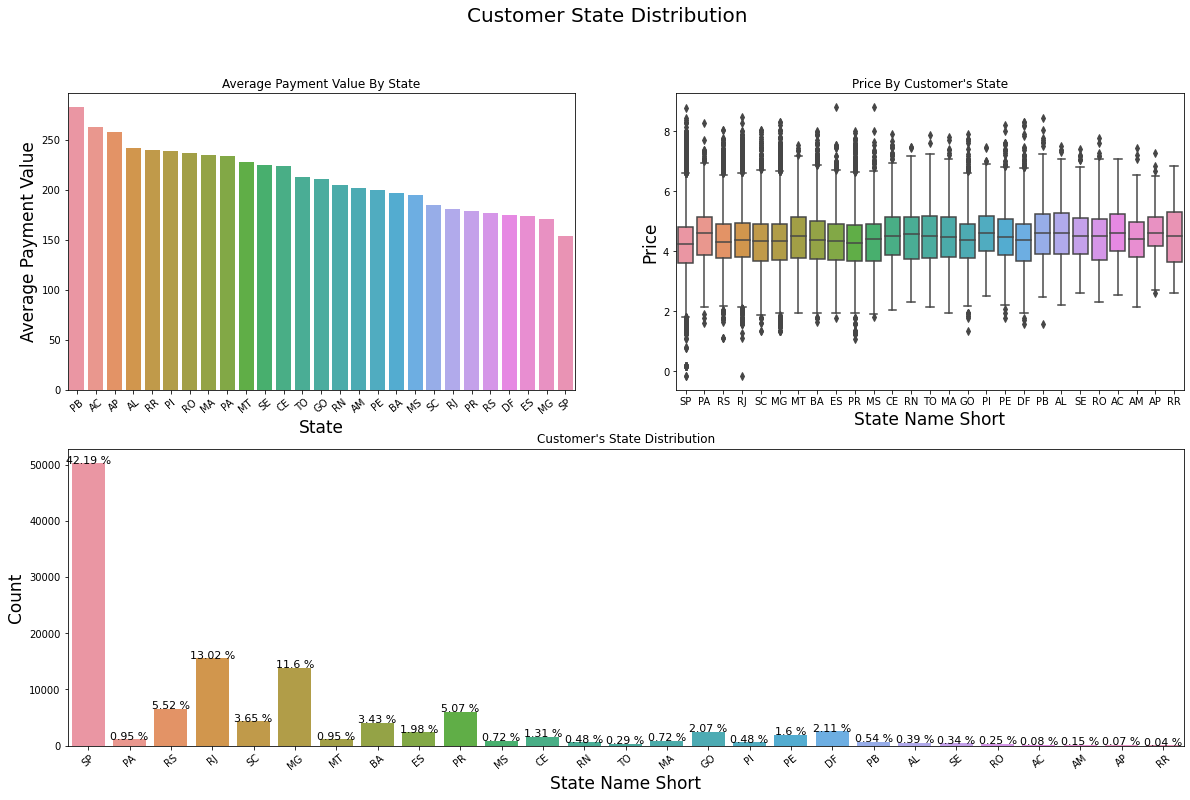

In [15]:
# Average payment value by state

average_payment_value_by_state = pd.pivot_table(data = train, index = ['customer_state'], values = 'payment_value', aggfunc = 'mean').sort_values(by = 'payment_value',ascending = False)
display(average_payment_value_by_state.head())
display(average_payment_value_by_state.shape)

fig, axs = plt.subplots(nrows = 2, ncols = 2)
fig.set_figwidth(20)
fig.set_figheight(12)
plt.suptitle("Customer State Distribution", fontsize = 20)

pbs = sns.barplot(x = average_payment_value_by_state.index, y = 'payment_value', data = average_payment_value_by_state, ax = axs[0][0])
pbs.set_xticklabels(pbs.get_xticklabels(), rotation = 40, ha = "center")
pbs.set_title("Average Payment Value By State")
pbs.set_xlabel("State", fontsize=17)
pbs.set_ylabel("Average Payment Value", fontsize=17)

ax_colspan = plt.subplot2grid((2,2), (1,0), colspan = 2)
csd = sns.countplot(x = 'customer_state', data = train, ax = ax_colspan)
csd.set_title("Customer's State Distribution")
csd.set_xlabel("State Name Short", fontsize=17)
csd.set_ylabel("Count", fontsize=17)
csd.set_xticklabels(csd.get_xticklabels(), rotation = 40)
for bin in csd.patches:
  x = bin.get_x()
  y = bin.get_height()
  binwidth = bin.get_width()
  percentage = f"{round((y / len(train['customer_state'])) * 100, 2)} %"
  csd.annotate(percentage, (x + binwidth/2, y + 0.5), ha = "center", fontsize = 11)

csp = sns.boxplot(x = 'customer_state', y = 'price_log', data = train[train["price"] != -1], ax = axs[0][1])
csp.set_title("Price By Customer's State")
csp.set_xlabel("State Name Short", fontsize=17)
csp.set_ylabel("Price", fontsize=17)

plt.show()

In [16]:
# ES, MS, SP has the lowest average payment value respectively
# PB, AC, AP has the highest average payment value respectively

# Most customers from SP
# Big difference between SP and  RJ in customer count (42% and 13% respectively)

,price
seller_state,
BA,458.953843
PB,394.986364
AM,392.333333
RO,340.157143
AC,267.000000


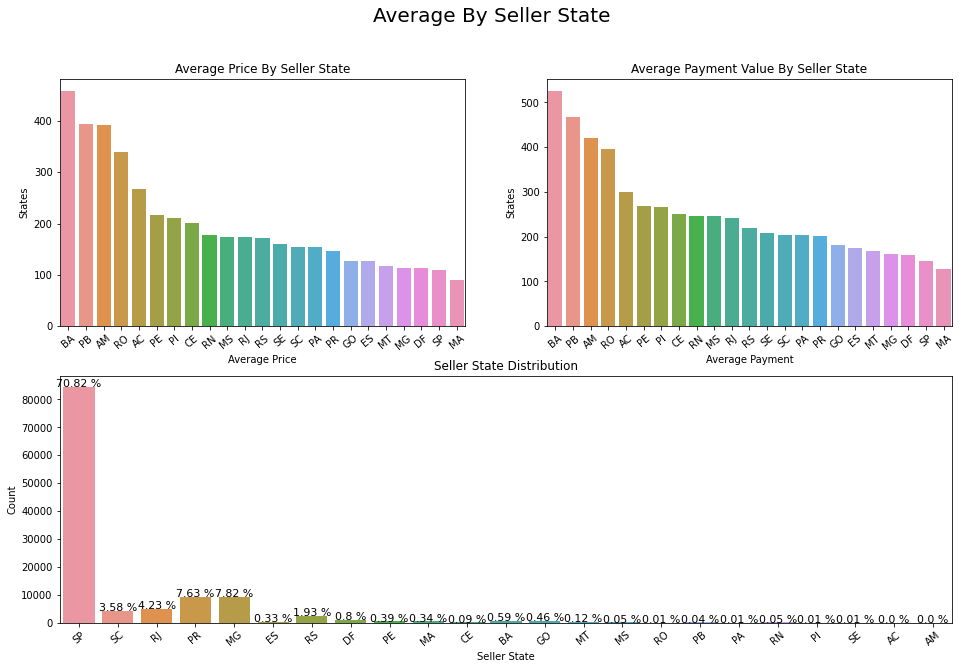

In [17]:
# Average price by sellers location
average_price_by_seller_location = pd.pivot_table(data = train, values = 'price', index = ["seller_state"], aggfunc = 'mean').sort_values(by = "price", ascending = False)
display(average_price_by_seller_location.head())

plt.figure(figsize = (16,10))
plt.suptitle("Average By Seller State", fontsize = 20)
plt.subplot(221)
apsl = sns.barplot(data = average_price_by_seller_location, x = average_price_by_seller_location.index, y = average_price_by_seller_location['price'])
apsl.set_title("Average Price By Seller State")
apsl.set_xlabel("Average Price")
apsl.set_ylabel("States")
apsl.set_xticklabels(apsl.get_xticklabels(), rotation = 40)

plt.subplot(222)
average_payment_value_by_seller_location = pd.pivot_table(data = train, values = 'payment_value', index = ["seller_state"], aggfunc = 'mean').sort_values(by = 'payment_value', ascending = False)
apvsl = sns.barplot(data = average_payment_value_by_seller_location, x = average_payment_value_by_seller_location.index, y = average_payment_value_by_seller_location['payment_value'])
apvsl.set_title("Average Payment Value By Seller State")
apvsl.set_xlabel("Average Payment")
apvsl.set_ylabel("States")
apvsl.set_xticklabels(apsl.get_xticklabels(), rotation = 40)

plt.subplot(212)
st = sns.countplot(x = 'seller_state', data = train)
st.set_title("Seller State Distribution")
st.set_xlabel("Seller State")
st.set_ylabel("Count")
st.set_xticklabels(st.get_xticklabels(), rotation = 40)
for p in st.patches:
  x = p.get_x()
  y = p.get_height()
  binwidth = p.get_width()
  percentage = f"{round((y / len(train['seller_state'])) * 100, 2)} %"
  st.annotate(percentage, (x + binwidth/2, y + 0.5), ha = "center", fontsize = 11)
plt.show()

In [18]:
# BA has highest price by seller's state
# BA also has the highest average payment value by seller's state
# Most sellers are from SP

Text(0, 0.5, 'Freight Value')

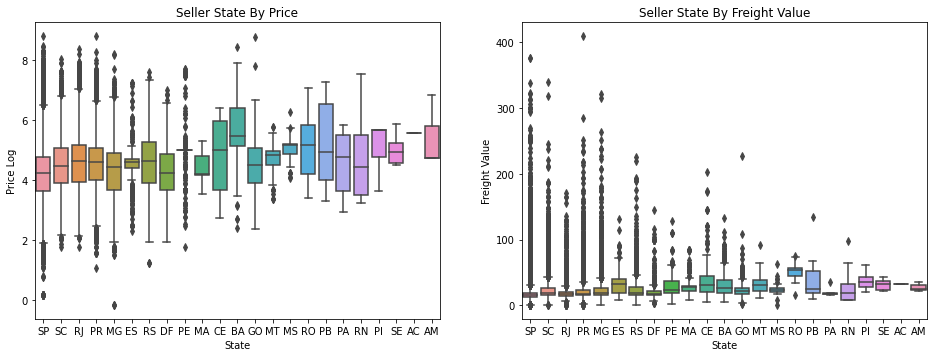

In [19]:
plt.figure(figsize = (16,12))

# Seller's state by price
plt.subplot(221)
lpst = sns.boxplot(x = "seller_state", y = "price_log", data = train[train["price"] != -1])
lpst.set_title("Seller State By Price")
lpst.set_xlabel("State")
lpst.set_ylabel("Price Log")
plt.subplot(222)
fvs = sns.boxplot(x = "seller_state", y = "freight_value", data = train)
fvs.set_title("Seller State By Freight Value")
fvs.set_xlabel("State")
fvs.set_ylabel("Freight Value")

In [20]:

train[train["order_item_id"].isnull()].isnull().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                162
order_delivered_carrier_date     832
order_delivered_customer_date    833
order_estimated_delivery_date      0
order_item_id                    833
product_id                       833
seller_id                        833
shipping_limit_date              833
price                            833
freight_value                    833
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
review_id                         19
review_score                      19
review_comment_title             736
review_comment_message           270
review_creation_date              19
r

In [21]:
# Where total item ordered is null, serveral other columns also null
# Majority of those column is null for every unrecorded order item id

order_item_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
order_id,103645,10317,2396,995,472,265,61,37,29,26,18,13,8,7,5,3,3,3,3,3,1


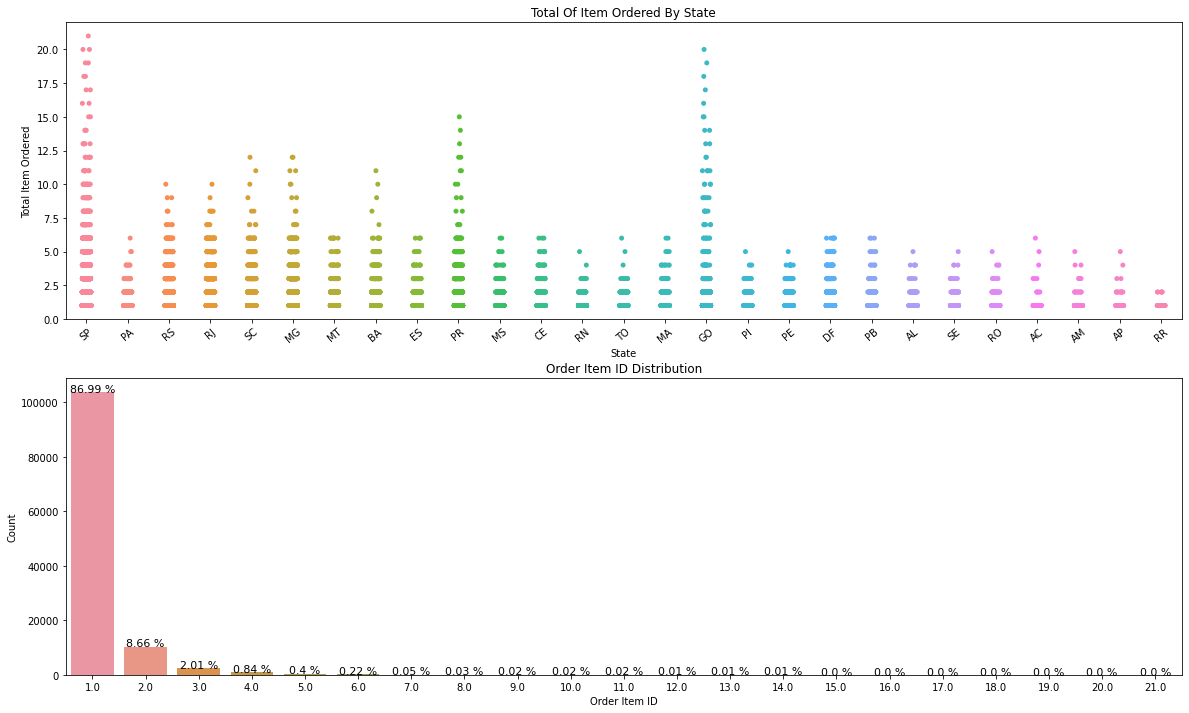

In [22]:
# Total item bought distribution

total_item_bought = pd.pivot_table(data = train, values = 'order_id', index = "order_item_id", aggfunc = "count")
display(total_item_bought.T)

fig, axs = plt.subplots(nrows = 2, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(12)
ois = sns.stripplot(x = 'customer_state', y = train[train['order_item_id'].notnull()]['order_item_id'], data = train, ax = axs[0])
ois.set_title("Total Of Item Ordered By State")
ois.set_xlabel("State")
ois.set_ylabel("Total Item Ordered")
ois.set_xticklabels(ois.get_xticklabels(), rotation = 40)

oid = sns.countplot(x = "order_item_id", data = train)
oid.set_title("Order Item ID Distribution")
oid.set_xlabel("Order Item ID")
oid.set_ylabel("Count")
for p in oid.patches:
  x = p.get_x()
  y = p.get_height()
  binwidth = p.get_width()
  percentage = f"{round((y / len(train['seller_state'])) * 100, 2)} %"
  oid.annotate(percentage, (x + binwidth/2, y + 0.5), ha = "center", fontsize = 11)
plt.show()

In [23]:
# SP an GO have the highest total item ordered
# 86.99% of items ordered are of only one item

review_score,1.0,2.0,3.0,4.0,5.0
order_id,15428,4162,9894,22319,66343


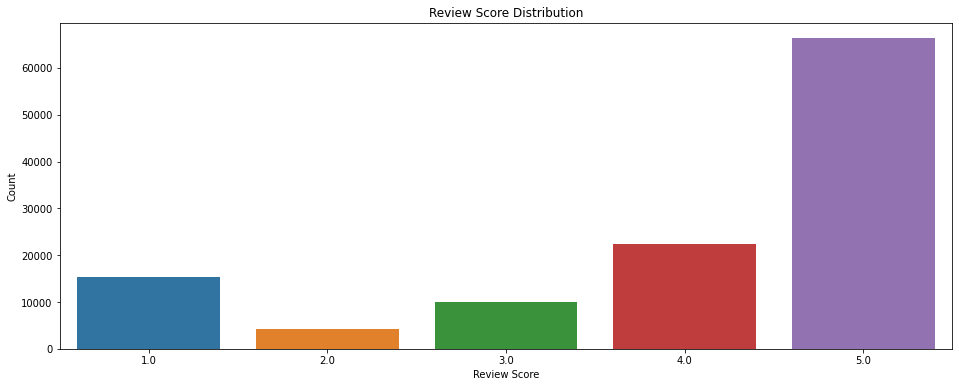

In [24]:
# Review Score Distribution
review_score_distribution = pd.pivot_table(data = train, values = "order_id", columns = "review_score", aggfunc = "count")
display(review_score_distribution)

plt.figure(figsize = (16,6))
rsd = sns.countplot(x = "review_score", data = train)
rsd.set_title("Review Score Distribution")
rsd.set_xlabel("Review Score")
rsd.set_ylabel("Count")

plt.show()

In [25]:
# Average review score by state
average_review_score_by_state = pd.pivot_table(data = train, values = "review_score", index = ["customer_state"], aggfunc = "mean").sort_values(by = "review_score", ascending = False)
display(average_review_score_by_state.T)

customer_state,AP,TO,SP,AC,PR,AM,MG,MS,RN,RS,PB,SC,DF,RO,GO,ES,PE,MT,PI,CE,BA,RJ,SE,PA,AL,MA,RR
review_score,4.240964,4.138643,4.108609,4.094737,4.08713,4.070175,4.068543,4.054651,4.049296,4.027184,3.992101,3.988861,3.987981,3.979381,3.97571,3.974656,3.957469,3.890277,3.849123,3.810167,3.807235,3.79983,3.795511,3.786101,3.715835,3.670588,3.576923


In [26]:
# Average review score by item